# **SuperStore EDA Final**


Brook Thompson

## Summary:

A collection of sales, shipping costs, quantity, profit, & discounts sold to different regions by Superstore between the years of 2012 - 2015.

## Import Libraries and Set Notebook Defaults:

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
# Display all data frame columns
pd.set_option('display.max_columns', None)

In [223]:
# Set notebook to display data without scientific notation
pd.options.display.float_format = '{:,.2f}'.format


In [224]:
# Default Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Superstore Data Files:

In [225]:
df_1 = pd.read_excel('/content/drive/MyDrive/Descriptive Analytics/SuperStore EDA/Data/Global_Superstore_Orders_2012_2015.xlsx', sheet_name = 0)

In [226]:
df_2 = pd.read_excel('/content/drive/MyDrive/Descriptive Analytics/SuperStore EDA/Data/Global_Superstore_Orders_2012_2015.xlsx', sheet_name = 1)

## Data Dictionary

Fields in **Global_Superstore_Orders_2012_2015.xlsx, Sheet 0**:

Rod ID - Unique Number assigned by the system to each row of data

Order ID - Unique arrangement of numbers & letters to identify a specific order

Order Date - The date the order was placed

Ship Date - The date the order was shipped

Ship Mode - The Shipping class the orderer wanted

Customer ID - A specific arrangement of letters & numbers to identify each customer

Customer Name - Name of each customer

Segment - Different Groups within a company

Postal Code - A series of letters & numbers that identifies a specific geographical location for delivery.

City - A specific location in a given State

State - A specific location in a given Country

Country - A specific location within a given region

Region - An area that has definable characteristics, but not always a defined boundry.

Market - A broad area where specific sales take place

Product ID - A specific arrangement of letters & numbers that identifies a specific product

Category - A designated division of inventory items for sorting purposes

Sub-category - Divisions within categories, which narrows down individual items purpose

Product Name - Allows you to identify a product

Sales - The price of each product and the quantity sold

Quantity - How many of each item was sold

Discount - How much hwas taken off of an individuals purchase

Profit - How much a company earns based on the difference between the price of an object and the cost to make it

Shipping Cost - The price it costs to ship to a certain geographical area

Order priority - The importance of each individual order and how you proceed with the processing order.

Fields in **Global_Superstore_Orders_2012_2015.xlsx, Sheet 1**:

Person - The name of the person that processes the order

Region - The region where the order is coming from

## Setting Data Types & Resolving Issues:

In [227]:
# Switching the data_type of zipcode from float to string
merged_df = merged_df.astype({'Postal Code': 'string'})

# Switching the data_type of Order ID from object to string
merged_df = merged_df.astype({'Order ID': 'string'})

# Switching the data_type of Costumer ID from object to string
merged_df = merged_df.astype({'Customer ID': 'string'})

# Switching the data_type of Product ID from object to String
merged_df = merged_df.astype({'Product ID': 'string'})

# Switching the data_type of Postal Code from float to string
merged_df = merged_df.astype({'Postal Code': 'string'})

# Switching it to say Unknown for the missing Postal Code Values
merged_df['Postal Code'] = merged_df['Postal Code'].fillna('Unknown')

# Setting Unknown Postal Codes to say Unknown
merged_df['Postal Code'] = merged_df['Postal Code'].fillna('Unknown')

#Ensure all values contain at least 5 characters and fill with leading zeros
df1['Postal Code'] = df1['Postal Code'].astype('str').str.zfill(5)


# Read, Review, & Prep Data

## Read & Merge Data Files:

Exploring the 1st sheet in the excel file:

In [228]:
df_1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


In [229]:
df_1.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,NaN,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,1.49,Medium
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,NaN,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.00,25.38,1.41,Medium
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,NaN,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,1.35,Medium
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,NaN,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.00,0.66,1.32,Medium
51289,6852,MX-2015-TD2099582-42369,2015-12-31,2016-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,NaN,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.00,0.56,1.20,Medium


In [230]:
df_1.shape

(51290, 24)

In [231]:
df_1.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
42857,11944,ES-2015-DW1319545-42237,2015-08-21,2015-08-26,Standard Class,DW-1319545,David Wiener,Corporate,NaN,Bar-le-Duc,Alsace-Champagne-Ardenne-Lorraine,France,Western Europe,Europe,OFF-BI-3251,Office Supplies,Binders,"Avery Binder, Clear",24.72,2,0.00,2.46,1.93,Medium
14561,42715,AG-2013-DC32853-41506,2013-08-20,2013-08-24,Standard Class,DC-32853,Debra Catini,Consumer,NaN,Baraki,Tipaza,Algeria,North Africa,Africa,TEC-CO-4770,Technology,Copiers,"HP Fax and Copier, Digital",172.53,1,0.00,86.25,16.25,High
15299,25044,IN-2013-CK1220527-41524,2013-09-07,2013-09-07,Same Day,CK-1220527,Chloris Kastensmidt,Consumer,NaN,Changchun,Jilin,China,Eastern Asia,Asia Pacific,OFF-LA-3272,Office Supplies,Labels,"Avery File Folder Labels, Adjustable",14.04,2,0.00,5.88,2.58,High
13193,20628,ID-2013-JF1519059-41454,2013-06-29,2013-07-06,Standard Class,JF-1519059,Jamie Frazer,Consumer,NaN,Palembang,Sumatera Selatan,Indonesia,Southeastern Asia,Asia Pacific,OFF-ST-6031,Office Supplies,Storage,"Smead File Cart, Blue",529.00,5,0.17,76.45,60.44,Low
48033,37837,US-2015-CC12220140-42325,2015-11-17,2015-11-20,First Class,CC-122201404,Chris Cortes,Consumer,"98,103.00",Seattle,Washington,United States,Western US,USCA,OFF-PA-6487,Office Supplies,Paper,Xerox 1933,73.68,6,0.00,34.63,4.05,High


In [232]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

Exploring the 2nd sheet of the excel file:

In [233]:
df_2.head()

,Person,Region
0,Marilène Rousseau,Caribbean
1,Andile Ihejirika,Central Africa
2,Nicodemo Bautista,Central America
3,Cansu Peynirci,Central Asia
4,Lon Bonher,Central US


In [234]:
df_2.tail()

,Person,Region
19,Katlego Akosua,Western Africa
20,Kaoru Xun,Western Asia
21,Angela Jephson,Western Canada
22,Gilbert Wolff,Western Europe
23,Derrick Snyders,Western US


In [235]:
df_2.sample(5)

,Person,Region
13,Vasco Magalhães,South America
8,Oxana Lagunov,Eastern Europe
21,Angela Jephson,Western Canada
12,Kauri Anaru,Oceania
22,Gilbert Wolff,Western Europe


In [236]:
df_2.shape

(24, 2)

In [237]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  24 non-null     object
 1   Region  24 non-null     object
dtypes: object(2)
memory usage: 516.0+ bytes


Merging both excel sheets together:

In [238]:
merged_df = pd.concat([df_1, df_2], axis=1)

## Review Fundamentals of a Merged Dataframe

In [239]:
merged_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person,Region
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,Marilène Rousseau,Caribbean
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,Andile Ihejirika,Central Africa
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,Nicodemo Bautista,Central America
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High,Cansu Peynirci,Central Asia
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,Lon Bonher,Central US


In [240]:
merged_df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person,Region
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,NaN,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,1.49,Medium,NaN,NaN
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,NaN,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.00,25.38,1.41,Medium,NaN,NaN
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,NaN,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,1.35,Medium,NaN,NaN
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,NaN,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.00,0.66,1.32,Medium,NaN,NaN
51289,6852,MX-2015-TD2099582-42369,2015-12-31,2016-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,NaN,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.00,0.56,1.20,Medium,NaN,NaN


In [241]:
merged_df.shape

(51290, 26)

In [242]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [243]:
merged_df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person,Region
33454,12907,ES-2014-SJ2021548-41998,2014-12-25,2014-12-30,Standard Class,SJ-2021548,Sarah Jordon,Consumer,NaN,Wuppertal,North Rhine-Westphalia,Germany,Western Europe,Europe,FUR-FU-3946,Furniture,Furnishings,"Deflect-O Light Bulb, Black",37.98,2,0.00,13.62,3.34,Medium,NaN,NaN
12759,37402,CA-2013-HR14830140-41443,2013-06-18,2013-06-22,Standard Class,HR-148301408,Harold Ryan,Corporate,"33,178.00",Miami,Florida,United States,Southern US,USCA,OFF-AR-3970,Office Supplies,Art,"Dixon Prang Watercolor Pencils, 10-Color Set w...",13.63,4,0.20,3.58,1.07,High,NaN,NaN
29682,4072,US-2014-AG1039036-41919,2014-10-07,2014-10-13,Standard Class,AG-1039036,Allen Goldenen,Consumer,NaN,Santo Domingo,Santo Domingo,Dominican Republic,Caribbean,LATAM,OFF-BI-6377,Office Supplies,Binders,"Wilson Jones Binder Covers, Recycled",6.16,1,0.20,-1.08,1.55,Medium,NaN,NaN
14429,36499,CA-2013-RE19450140-41501,2013-08-15,2013-08-19,Standard Class,RE-194501404,Richard Eichhorn,Consumer,"94,601.00",Oakland,California,United States,Western US,USCA,FUR-FU-6299,Furniture,Furnishings,Tensor Computer Mounted Lamp,104.23,7,0.00,28.14,5.73,Medium,NaN,NaN
49445,16163,IT-2015-AB1010562-42342,2015-12-04,2015-12-11,Standard Class,AB-1010562,Adrian Barton,Consumer,NaN,Dublin,Dublin,Ireland,Northern Europe,Europe,OFF-ST-4293,Office Supplies,Storage,"Fellowes Trays, Blue",143.47,5,0.50,-123.52,14.75,Medium,NaN,NaN
41257,232,MX-2015-RK1930082-42206,2015-07-21,2015-07-23,Second Class,RK-1930082,Ralph Kennedy,Consumer,NaN,Mexicali,Baja California,Mexico,Central America,LATAM,FUR-CH-4655,Furniture,Chairs,"Hon Executive Leather Armchair, Black","1,219.04",5,0.20,198.04,185.44,Critical,NaN,NaN
39612,27471,ID-2015-RE19405102-42169,2015-06-14,2015-06-19,Standard Class,RE-19405102,Ricardo Emerson,Consumer,NaN,Caloocan,National Capital,Philippines,Southeastern Asia,Asia Pacific,TEC-PH-3129,Technology,Phones,"Apple Audio Dock, VoIP",125.24,1,0.25,-3.34,7.71,High,NaN,NaN
12751,30513,IN-2013-EC1405092-41443,2013-06-18,2013-06-24,Standard Class,EC-1405092,Erin Creighton,Consumer,NaN,Waitakere,Auckland,New Zealand,Oceania,Asia Pacific,FUR-BO-3895,Furniture,Bookcases,"Dania Corner Shelving, Pine",444.31,6,0.40,-89.03,22.98,Medium,NaN,NaN
38741,3416,MX-2015-MS1753082-42153,2015-05-29,2015-06-02,Standard Class,MS-1753082,MaryBeth Skach,Consumer,NaN,Celaya,Guanajuato,Mexico,Central America,LATAM,OFF-EN-4444,Office Supplies,Envelopes,"GlobeWeis Mailers, Security-Tint",54.60,2,0.00,21.84,3.84,Medium,NaN,NaN
10023,16805,ES-2013-BW1111096-41336,2013-03-03,2013-03-09,Standard Class,BW-1111096,Bart Watters,Corporate,NaN,Oslo,Oslo,Norway,Northern Europe,Europe,OFF-ST-4294,Office Supplies,Storage,"Fellowes Trays, Industrial",115.74,2,0.00,27.72,10.49,Medium,NaN,NaN


In [244]:
# Checking the number of unique values in each field
merged_df.nunique()

,0
Row ID,51290
Order ID,25728
Order Date,1430
Ship Date,1464
Ship Mode,4
Customer ID,17415
Customer Name,796
Segment,3
Postal Code,631
City,3650


In [245]:
# Count values for each field
merged_df.count()

,0
Row ID,51290
Order ID,51290
Order Date,51290
Ship Date,51290
Ship Mode,51290
Customer ID,51290
Customer Name,51290
Segment,51290
Postal Code,9994
City,51290


In [246]:
# Count null values for each field
merged_df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Postal Code,41296
City,0


In [247]:
# Exploring the data types of each of the fields
merged_df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Postal Code,float64
City,object


## Descriptive Statistics:

In [248]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [249]:
merged_df['Category'].describe()

,Category
count,51290
unique,3
top,Office Supplies
freq,31289


In [250]:
merged_df['Market'].describe()

,Market
count,51290
unique,5
top,Asia Pacific
freq,14302


In [251]:
# Sales by Segment
df1.groupby('Segment')['Sales'].sum()

,Sales
Segment,
Consumer,"6,507,949.42"
Corporate,"3,824,697.52"
Home Office,"2,309,854.97"


In [252]:
# Sales by Region
df1.groupby('Region')['Sales'].sum()

,Sales
Region,
Canada,"66,928.17"
Caribbean,"324,280.86"
Central Africa,"143,630.01"
Central America,"1,223,100.63"
Central Asia,"19,311.46"
Central US,"501,239.89"
Eastern Africa,"127,856.02"
Eastern Asia,"855,059.39"
Eastern Europe,"310,033.44"


In [253]:
# Sales by Market
df1.groupby('Market')['Sales'].sum()

,Sales
Market,
Africa,"783,773.21"
Asia Pacific,"4,042,658.27"
Europe,"3,287,336.23"
LATAM,"2,164,605.17"
USCA,"2,364,129.03"


In [254]:
# Sales by Category
df1.groupby('Category')['Sales'].sum()

,Sales
Category,
Furniture,"4,110,451.90"
Office Supplies,"3,787,492.51"
Technology,"4,744,557.50"


In [255]:
# Sales by Sub-Category
df1.groupby('Sub-Category')['Sales'].sum()

,Sales
Sub-Category,
Accessories,"749,237.02"
Appliances,"1,010,535.53"
Art,"371,613.15"
Binders,"461,869.39"
Bookcases,"1,466,572.24"
Chairs,"1,501,681.76"
Copiers,"1,509,436.27"
Envelopes,"169,217.49"
Fasteners,"89,495.05"


## Exploratoy Data Analysis:

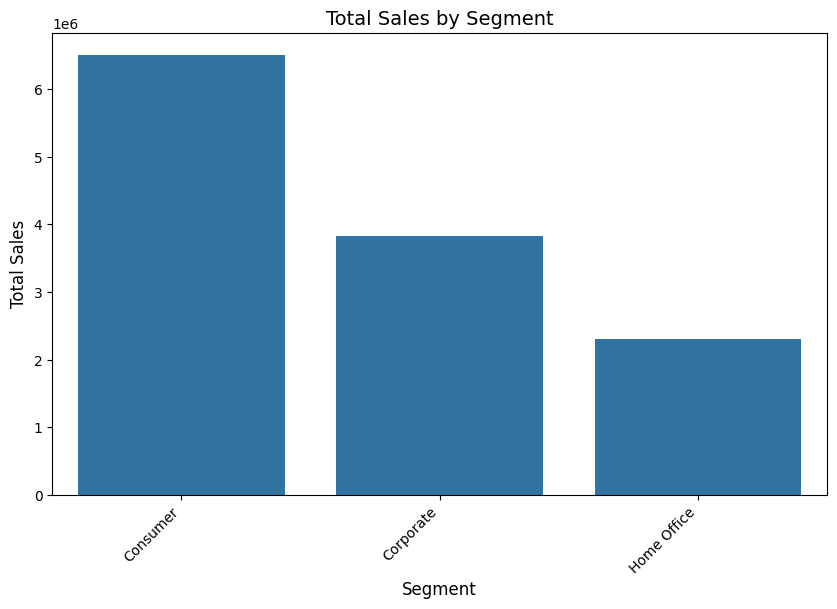

In [256]:
#Bar chart of Total Sales by Segment

sales_by_segment = df.groupby('Segment')['Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales by Segment", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


The Bar Chart of Total Sales by Segment show which buy the most from the company. It shows that consumers lead sales in the company, while people from the home office actually have the least sales.

<Axes: xlabel='Region'>

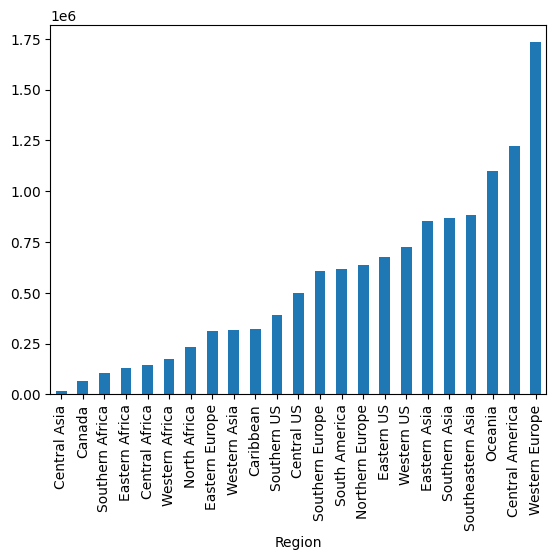

In [257]:
# Bar chart for total sales by region from greatest to least
df1.groupby('Region')['Sales'].sum().sort_values(ascending=True).plot(kind='bar')

The Total Sales by Region graph shows that the company sells the least to Central Asia by a lot. The region that holds the most purchases from the company goes to Western Europe.

<Axes: ylabel='Market'>

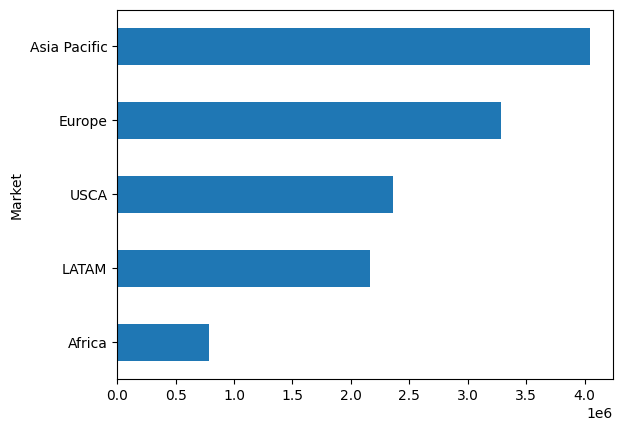

In [258]:
# Horizontal Bar Chart of Total sales by Market from greatest to least
df1.groupby('Market')['Sales'].sum().sort_values(ascending=True).plot(kind='barh')

The graph between market and sales shows that the Market that SuperStore sells the most to is Asia Pacific. The market that Superstore sells the least ammount to is Africa.

<Axes: ylabel='Category'>

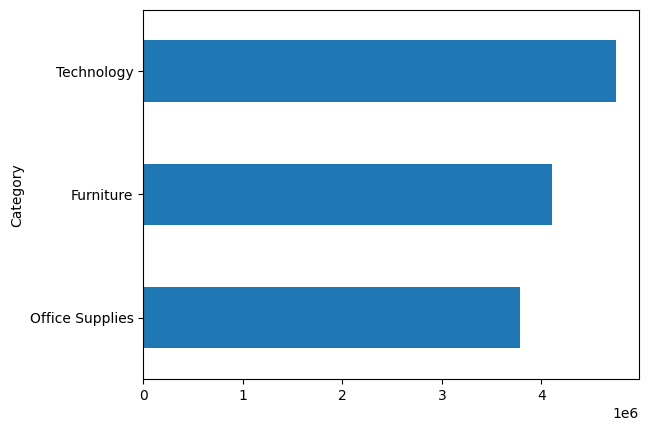

In [259]:
# Horizontal Bar Chart of Total sales by Category from greatest to least
df1.groupby('Category')['Sales'].sum().sort_values(ascending=True).plot(kind='barh')

The graph shown is between each category and the total sales. The most sales are within the technology category. Although technology is the most sold category, their is no major significance between the three categories. All three do fairly well for the company.

<Axes: ylabel='Sub-Category'>

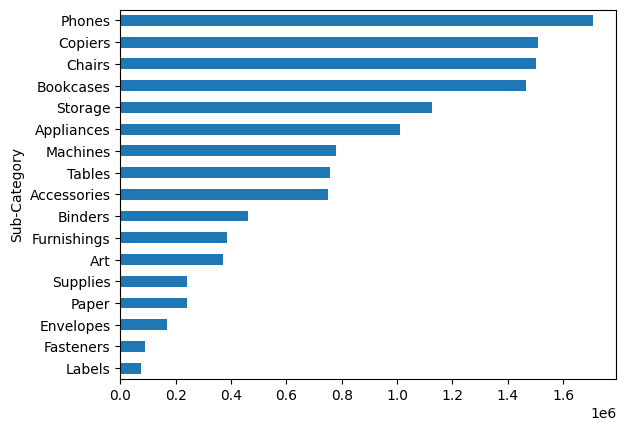

In [260]:
# Horizontal Bar Chart of Total sales by Sub-Category from greatest to least
df1.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=True).plot(kind='barh')

The graph showing total sales by each sub-category shwos that labels carry the least amount of sales, while phones carry the highest amount of sales.

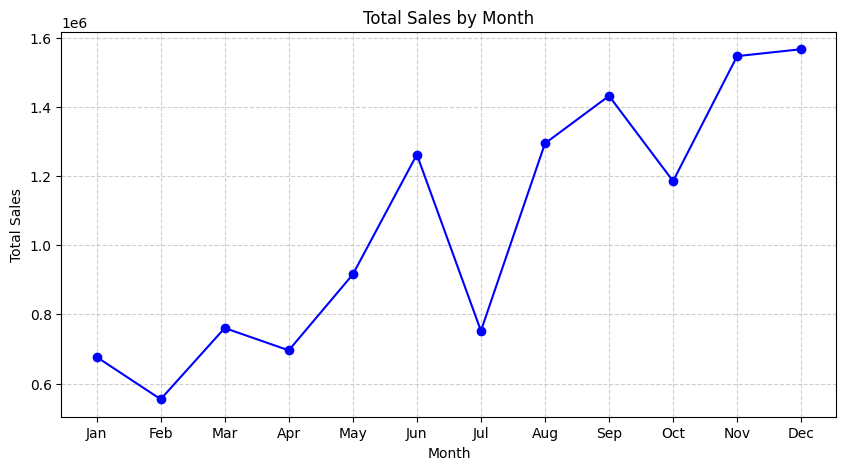

In [261]:
# Total Sales by Month

df["Month"] = df["Order Date"].dt.month

sales_by_month = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(10, 5))
plt.plot(sales_by_month.index, sales_by_month.values, marker="o", linestyle="-", color="b")

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


In this visualization between total sales by month, we can see that in December is their peak amount of sales. This could be due to Christams and a lot more people purchasing gifts. We see that the least amount of sales is in Febuary. This might be because of how much people spend during the holidays and the new year.

<ipython-input-262-2d5a6d3d2ff8>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sales_by_quarter = df.resample('Q', on='Order Date')['Sales'].sum()


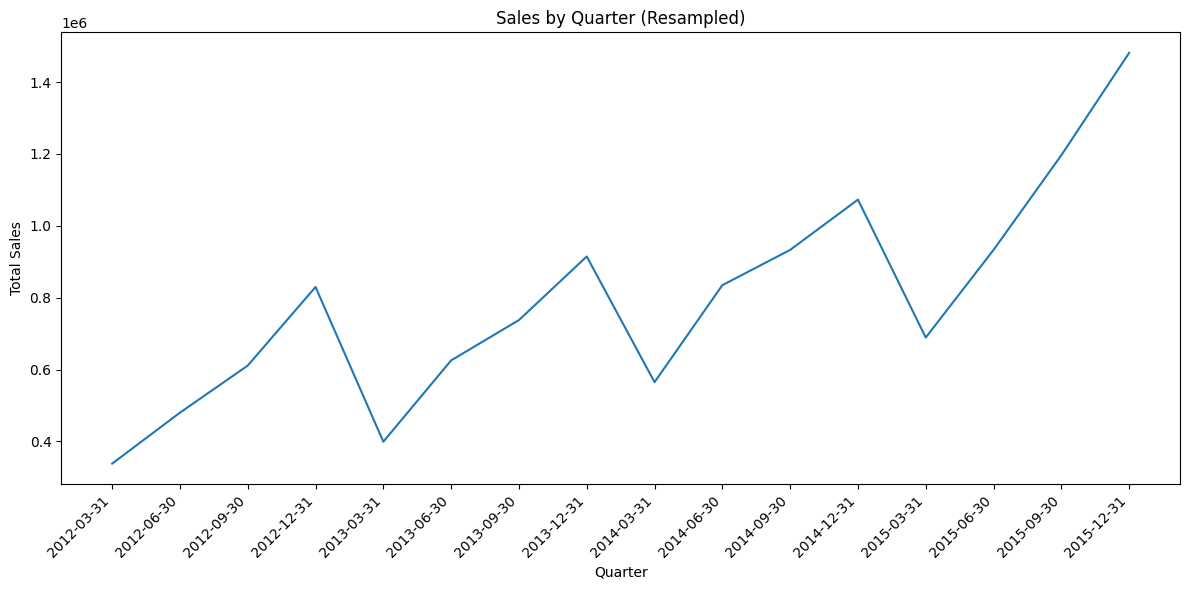

In [262]:
#Create a Line Chart to Display Sales by Quarter with the resample method

sales_by_quarter = df.resample('Q', on='Order Date')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_quarter.index.astype(str), sales_by_quarter.values)
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Sales by Quarter (Resampled)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The visualization between total sales by quarter shows that the last three months of the year are when the most sales in the company occur.

<ipython-input-263-e99bb9a76659>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  profit_by_month = df.resample('M', on='Order Date')['Profit'].sum()


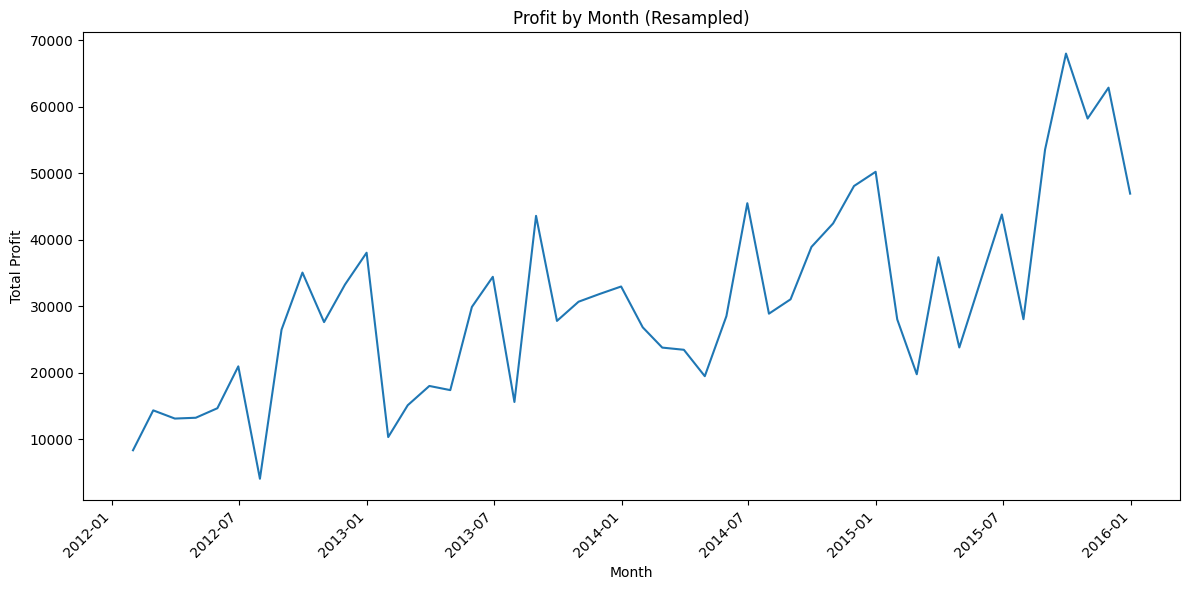

In [263]:
# creating a time series analyses for profit by month using the resample method

profit_by_month = df.resample('M', on='Order Date')['Profit'].sum()

plt.figure(figsize=(12, 6))
plt.plot(profit_by_month.index, profit_by_month.values)
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Profit by Month (Resampled)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The visualization shows the profit by each month. It shows that in every year the company is displayed on having the highest sales in December. This means that it is a reoccuring pattern. This helps the company know what to expect in future years. They can use this information to maximize their marketing in other months that are having less sales.

<ipython-input-264-8fb62789a19d>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  profit_by_quarter = df.resample('Q', on='Order Date')['Profit'].sum()


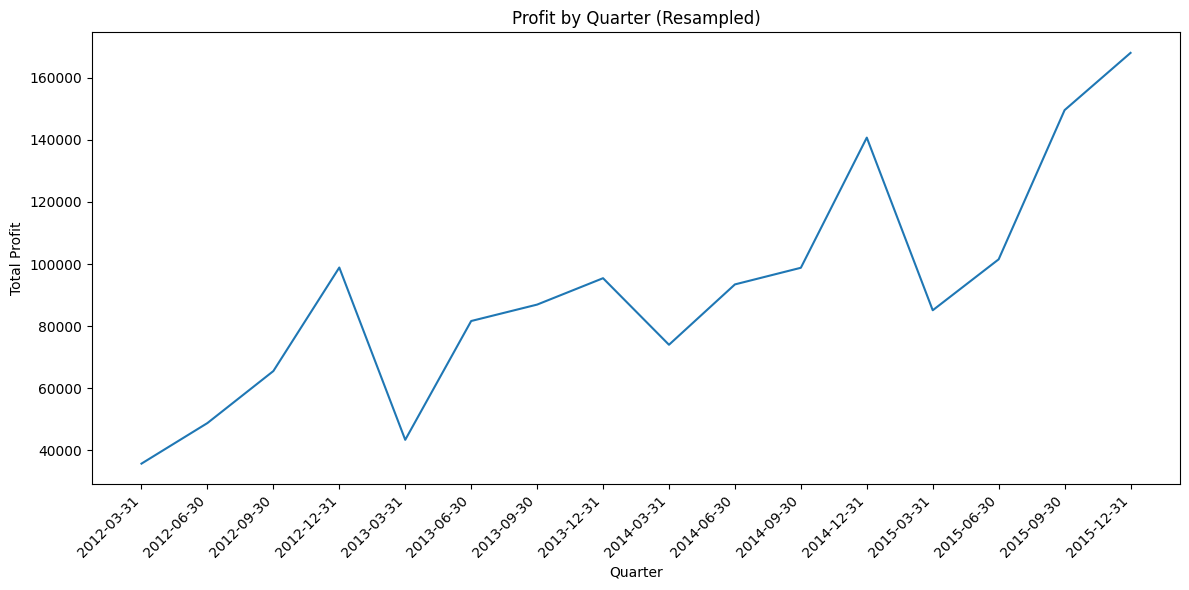

In [264]:
# creating a time series analyses for profit by quarter using the resample method
profit_by_quarter = df.resample('Q', on='Order Date')['Profit'].sum()

plt.figure(figsize=(12, 6))
plt.plot(profit_by_quarter.index.astype(str), profit_by_quarter.values)
plt.xlabel('Quarter')
plt.ylabel('Total Profit')
plt.title('Profit by Quarter (Resampled)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The visualization between the total profit by each quarter shows that the last three months in each years is when the company is having the highest profit. This helps the company plan for future years, since the trend has occured for three years in a row.

<Axes: xlabel='Order Priority'>

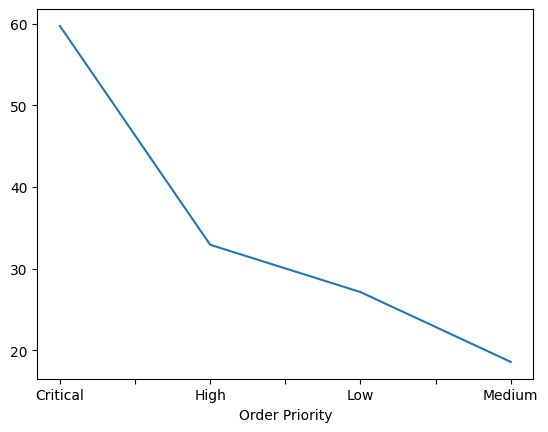

In [265]:
# Creating a line chart between order priority and shipping cost
df1.groupby('Order Priority')['Shipping Cost'].mean().plot(kind='line')

When looking at the visualization between Order priority and shipping cost, it makes sense that a critical priority would cost the most. What I don't understand is why low priority costs more than Medium priority. Is this a flaw in the system or do they want more people to choose medium?

In [266]:
# Calculate the total revenue for each customer.
merged_df['Total_Revenue'] = merged_df['Sales'] * merged_df['Quantity']

<Axes: xlabel='Customer Name'>

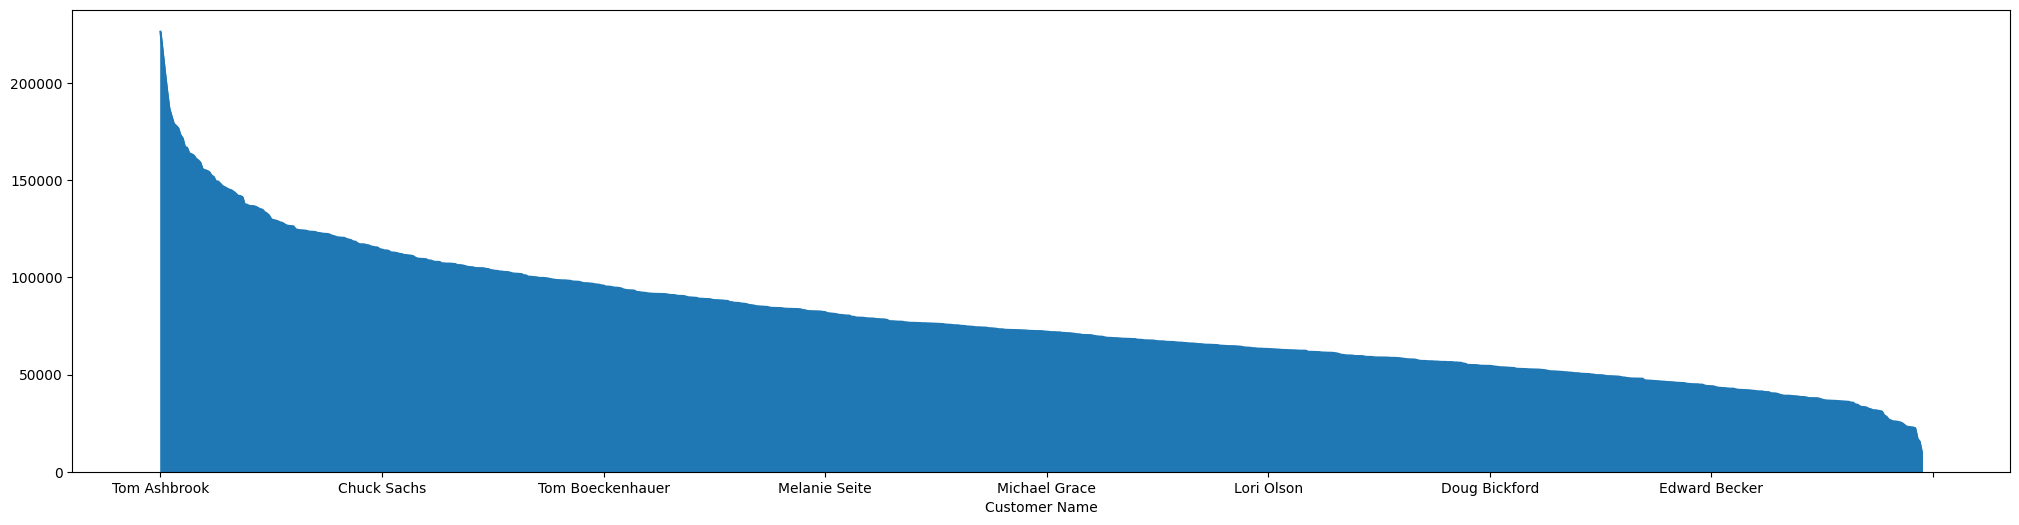

In [267]:
# Area chart of the total revenue for each customer
plt.figure(figsize=(25, 6))
merged_df.groupby('Customer Name')['Total_Revenue'].sum().sort_values(ascending=False).plot(kind='area')

The visualization shows the Tom Ashbrook, one of the customers of superstore actually leads with the highest renvue made from any customer. It says that he has spent over two hundred thousand dollars in the company.

In [268]:
# Calculate the profit margin for each category
merged_df['Profit_Margin'] = (merged_df['Profit'] / merged_df['Sales']) * 100

<Axes: xlabel='Category'>

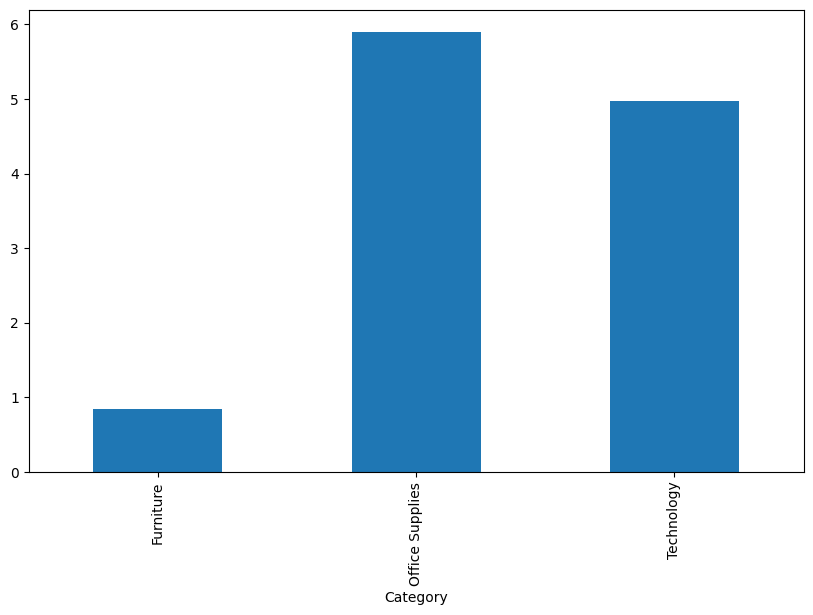

In [269]:
# Visualization for profit margin for each category
plt.figure(figsize=(10, 6))
merged_df.groupby('Category')['Profit_Margin'].mean().plot(kind='bar')

The visualization above shows that the furniture category generates the least amount of profit. This means that they are not earning nearly as much money from their furniture sales, as they are in their other categories. Even though the sales of all three categories are fairly similar.